In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('./framingham.csv')

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [24]:
z_scores = np.abs(stats.zscore(data))
print(z_scores)

          male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0     1.153192  1.234951        NaN       0.988271         NaN     NaN   
1     0.867158  0.418257        NaN       0.988271         NaN     NaN   
2     1.153192  0.184916        NaN       1.011868         NaN     NaN   
3     0.867158  1.331800        NaN       1.011868         NaN     NaN   
4     0.867158  0.418257        NaN       1.011868         NaN     NaN   
...        ...       ...        ...            ...         ...     ...   
4233  1.153192  0.048425        NaN       1.011868         NaN     NaN   
4234  1.153192  0.165095        NaN       1.011868         NaN     NaN   
4235  0.867158  0.184916        NaN       1.011868         NaN     NaN   
4236  0.867158  0.651598        NaN       1.011868         NaN     NaN   
4237  0.867158  0.281766        NaN       0.988271         NaN     NaN   

      prevalentStroke  prevalentHyp  diabetes  totChol     sysBP     diaBP  \
0            0.077033      0.6711

In [29]:
num_outliers = (z_scores>3).sum()
print(num_outliers)

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke     25
prevalentHyp         0
diabetes           109
totChol              0
sysBP               48
diaBP               41
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64


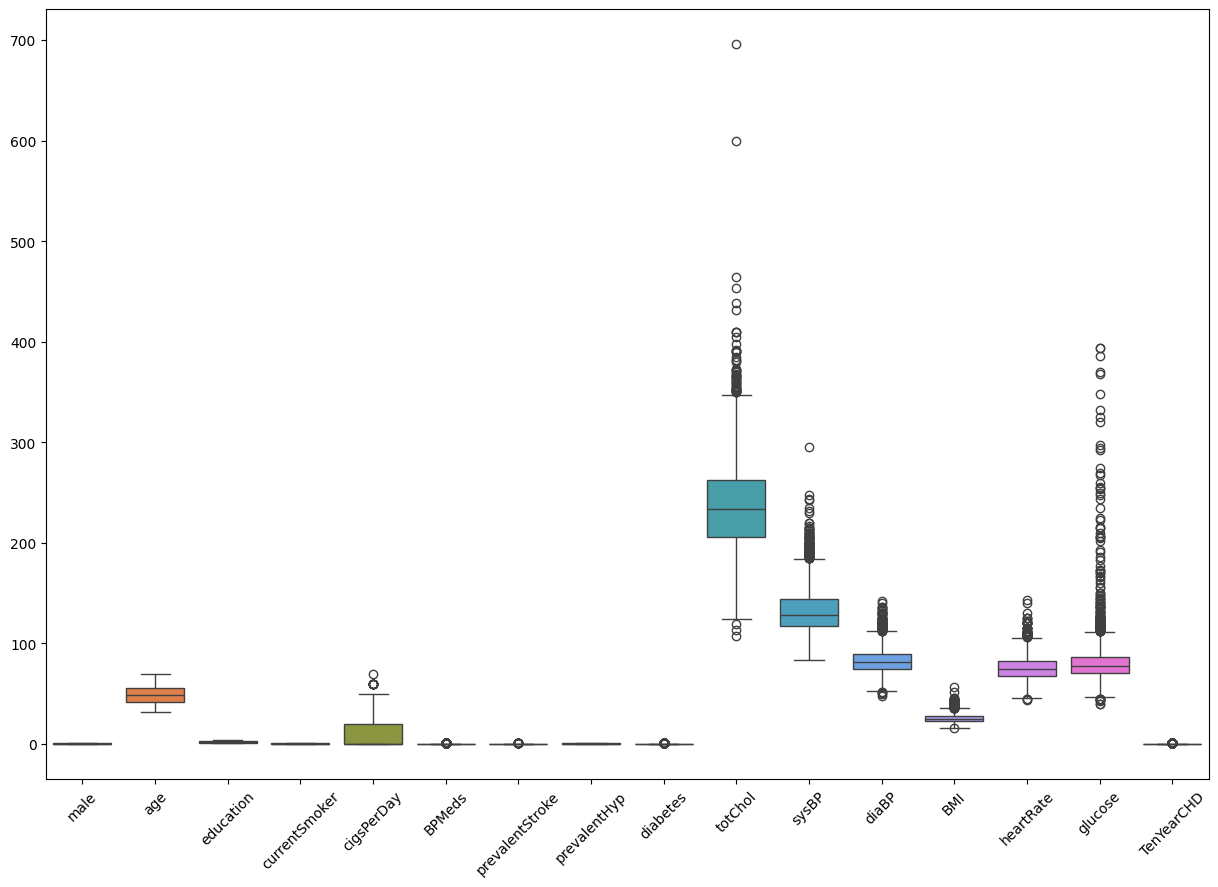

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data=data)

plt.show()

In [35]:
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer (strategy='median')

cols_mode = ['education']
cols_median = ['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose' ]

data[cols_mode]= imputer_mode.fit_transform(data[cols_mode])
data[cols_median]= imputer_median.fit_transform(data[cols_median])